<a href="https://colab.research.google.com/github/MarcioB1999/Iniciacao_cientifica/blob/main/IC_desenha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from itertools import permutations as pt
import pandas as pd  
import networkx as nx
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns
from matplotlib import transforms
from copy import copy

In [ ]:
class vertice:

  def __init__(self, conf, numb):
    self.number=numb
    self.c=conf
    self.ident_A=[]
    self.peso=sum(conf)-4



  def Identificador_c(self):
    A={0:[0,1,3],1:[0,1,2],2:[1,2,5],3:[0,3,4],4:[3,4,5,7],5:[4,5,2],6:[6,7],7:[4,6,7,8],8:[7,8]}
    ident_Aux=[]

    for i in list(A.keys()):
      
      ident_i=[]
      aux=[]
      
      for j in A[i]:
        if(self.c[j]==1):
          ident_i.append(j)

      ident_Aux.append(ident_i)
    

    self.ident_A=ident_Aux
    return self.ident_A


  def validacao(self):
      
      aux1=pd.DataFrame(self.ident_A).iloc[[1,4,7]].copy()
      
      aux2=aux1.copy()
      aux2.drop_duplicates(inplace=True)
      aux2.dropna(inplace=True, how='all') 
     
      if(len(aux2)==len(aux1)):
          return True
      else:
          return False

In [ ]:
class grafo_plot:


  def __init__(self,vertices):
    self.vertices=vertices
    self.n=len(vertices)
    self.A={0:[0,1,3],1:[0,1,2],2:[1,2,5],3:[0,3,4],4:[3,4,5,7],5:[4,5,2],6:[6,7],7:[4,6,7,8],8:[7,8]}
    self.conexoes=[]
    self.conf=[]
    self.pos={}

  def Criar_Conf(self):
    conf=[]
    for i in self.vertices:
      conf=conf+list(i.c)
    self.conf=conf


  def Criar_Conexoes(self):
    conexoes=[]
    aux=np.arange(0,9*(self.n),9)
    #criar conexoes dentro dos proprios grafos
    for i in aux:

      for w in list(self.A.keys()):

        for j in self.A[w]:

          if(j>w):
            conexoes.append(sorted([i+w,i+j]))


    #criar conexoes de junções
    if(vertices[0].number<378):
      b=2
    else:
      b=8

    for i in range(self.n-1):
      
      if(vertices[0].number<378):
        resto=(b+1)%2
      else:
        resto=b%2

      if(resto==0):
        for j in [0,3,6]:
          conexoes.append([b-j,b+1+j])

        b+=3

      else:
        for j in [0,3,6]:
          conexoes.append([b+j,b+13-j])

        b+=15
      
      self.conexoes=conexoes


  def Criar_Pos(self):
    k=0
    dict={}
    for w in range(self.n):
      
      if(self.vertices[w].number<378):#
        for j in range(3):#y
          for i in range(3):
            dict[k]=[3*(w)+i,j]
            k+=1
      else:
        for j in [2,1,0]:#y
          for i in range(3):
            dict[k]=[3*(w)+i,j]
            k+=1
    
    self.pos=dict



  def Funcaux(self,c_i):
    if(c_i==1):
      return 'grey'
    else:
      return 'white'


  def Plotar(self):
    fig=plt.figure(figsize=(200,30))
    

    G = nx.Graph()

    G.add_edges_from(self.conexoes)
    values=list(map(self.Funcaux,self.conf))


    nx.draw(G,self.pos, node_size=5000,node_color='white',cmap = plt.get_cmap('jet'), with_labels=True, edge_color='black', edgecolors="tab:gray",width=6)
    plt.savefig('figura1.pdf',format='pdf',bbox_inches='tight')







    G = nx.Graph()

    G.add_edges_from(self.conexoes)
    values=list(map(self.Funcaux,self.conf))
  


    nodes=[i for i in range(len(self.conf)) if self.conf[i]==1]

    nx.draw(G,self.pos, node_size=5000,nodelist=nodes,node_color='grey',cmap = plt.get_cmap('jet'), with_labels=True, edge_color='black', edgecolors="tab:gray",width=6)
    plt.savefig('figura1.png',format='png',bbox_inches='tight')



    plt.show()


In [ ]:
c=np.zeros(9) 
all=c.copy()


for i in range(9):
  
  c[i]=1
  perm=pd.DataFrame(pt(c)).drop_duplicates()

  all=np.vstack([all, perm])


S=[]
numb=0


for S1 in all:

    S.append(vertice(S1,numb))
    numb+=1



val=[]
new_number=0
for i in S:
    i.Identificador_c()

    if(i.validacao()):
        i.number=new_number
        val.append(i)
        new_number+=1

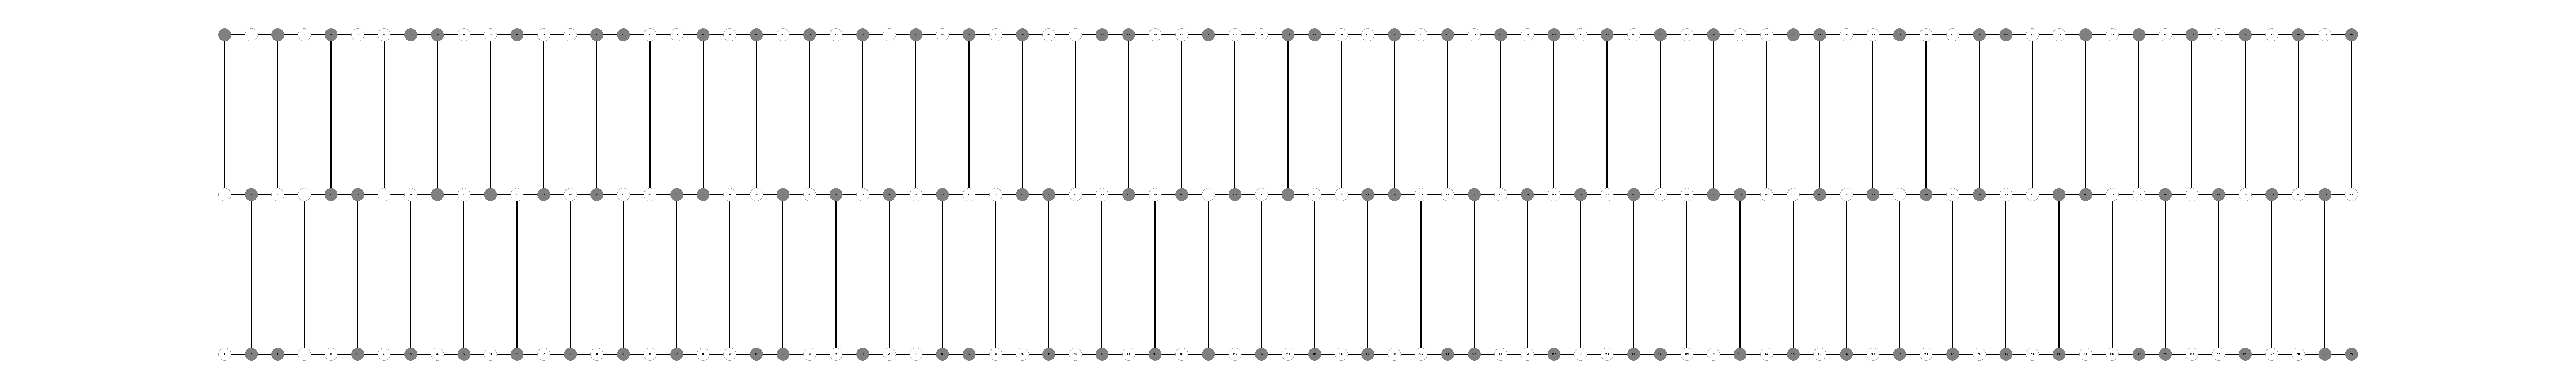

In [ ]:


n = 378
B = [179, 123, 88, 54, 117, 55, 51, 65, 53, 38, 62, 177, 97, 179, 123, 88, 54, 117, 55, 51, 65, 53, 38, 62, 177, 97, 179]
#B = [177, 14, 61, 262, 54, 117, 55, 51, 65, 53, 38, 62, 177]
vertices = []
for i in range(len(B)):
  vertices = vertices + [val[B[i]]]

#vertices=[val[179],val[123],val[88],val[54],val[117],val[55],val[51],val[65],val[53],val[38],val[62],val[177],val[97],val[179],val[123],val[88],val[54],val[117],val[55],val[51],val[65],val[53],val[38],val[62],val[177],val[97],val[179]]

vertices1=[]
for i in range(len(B)):
  aux=copy(vertices[i])
  if(i%2==0):
    aux.number=aux.number + n
  vertices1.append(copy(aux))




u=grafo_plot(vertices1)
u.Criar_Conf()
u.Criar_Conexoes()
u.Criar_Pos()
u.Plotar()